In [17]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from astropy.nddata import CCDData
import glob
from astropy.io import fits
from scipy.ndimage import interpolation as interp
from astropy.stats import sigma_clipped_stats

from skimage.feature.register_translation import (register_translation, _upsampled_dft)


In [2]:
bias_files = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias*.fits')


In [3]:
image_data_list = []
for bias_file in bias_files:
    image_data = fits.getdata(bias_file)
    image_data_list.append(image_data)
    print(bias_file, np.mean(image_data))

/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias_BIN1_20190503_100506.fits 1310.9446687698364
/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias_BIN1_20190503_100525.fits 1310.9541902542114
/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias_BIN1_20190503_100534.fits 1310.969250679016
/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias_BIN1_20190503_100543.fits 1310.98957157135
/Users/megankokoris1/Desktop/Astro_480_Project/Images/Bias_BIN1_20190503_100548.fits 1310.9803161621094


In [4]:
median_bias = np.median(image_data_list, axis=0)
print(median_bias.shape)

(1024, 1024)


In [5]:
print(np.mean(image_data_list))

1310.9675994873046


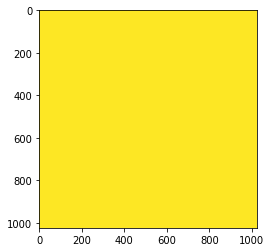

In [6]:
plt.imshow(median_bias, vmin=300, vmax=350)

In [7]:
flat_files_g = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_g*.fits')
image_data_list_flat_g = []
for flat_file_g in flat_files_g:
    image_data_flat_g = fits.getdata(flat_file_g)
    image_data_list_flat_g.append(image_data_flat_g)
    print(flat_file_g, np.mean(image_data_flat_g))

/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_g_001.fits 19364.82401561737
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_g_002.fits 19752.33280658722
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_g_003.fits 19843.74731349945


In [8]:
flat_files_r = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_r*.fits')
image_data_list_flat_r = []
for flat_file_r in flat_files_r:
    image_data_flat_r = fits.getdata(flat_file_r)
    image_data_list_flat_r.append(image_data_flat_r)
    print(flat_file_r, np.mean(image_data_flat_r))

/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_r_001.fits 19591.937231063843
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_r_002.fits 19942.078386306763
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_r_003.fits 19971.201760292053


In [9]:
flat_files_z = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_z*.fits')
image_data_list_flat_z = []
for flat_file_z in flat_files_z:
    image_data_flat_z = fits.getdata(flat_file_z)
    image_data_list_flat_z.append(image_data_flat_z)
    print(flat_file_z, np.mean(image_data_flat_z))

/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_z_001.fits 19270.316809654236


In [10]:
flat_files_i = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_i*.fits')
image_data_list_flat_i = []
for flat_file_i in flat_files_i:
    image_data_flat_i = fits.getdata(flat_file_i)
    image_data_list_flat_i.append(image_data_flat_i)
    print(flat_file_i, np.mean(image_data_flat_i))

/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_i_001.fits 18368.183453559875
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_i_002.fits 19859.15745639801
/Users/megankokoris1/Desktop/Astro_480_Project/Images/domeflat_sdss_i_003.fits 19979.83035182953


In [11]:
median_flat_g = np.median(image_data_list_flat_g, axis=0)
print(median_flat_g.shape)
print(np.mean(image_data_list_flat_g))

(1024, 1024)
19653.634711901348


In [12]:
median_flat_i = np.median(image_data_list_flat_i, axis=0)
print(median_flat_i.shape)
print(np.mean(image_data_list_flat_i))

(1024, 1024)
19402.390420595806


In [13]:
median_flat_r = np.median(image_data_list_flat_r, axis=0)
print(median_flat_r.shape)
print(np.mean(image_data_list_flat_r))

(1024, 1024)
19835.072459220886


In [14]:
median_flat_z = np.median(image_data_list_flat_z, axis=0)
print(median_flat_z.shape)
print(np.mean(image_data_list_flat_z))

(1024, 1024)
19270.316809654236


In [15]:
M13g = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M13_sdss_g*.fits')
M13i = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M13_sdss_i*.fits')
M13r = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M13_sdss_r*.fits')
M13z = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M13_sdss_z*.fits')
M5g = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M5_sdss_g*.fits')
M5i = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M5_sdss_i*.fits')
M5r = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M5_sdss_r*.fits')
M5z = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/M5_sdss_z*.fits')
NGCg = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/NGC_6749_sdss_g*.fits')
NGCi = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/NGC_6749_sdss_i*.fits')
NGCr = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/NGC_6749_sdss_r*.fits')
NGCz = glob.glob('/Users/megankokoris1/Desktop/Astro_480_Project/Images/NGC_6749_sdss_z*.fits')

In [21]:
image_data_list_M13g = []
for M13g_file in M13g:
    image_data = (fits.getdata(M13g_file) - median_bias)/median_flat_g
    image_data_list_M13g.append(image_data)


In [22]:
image_data_list_M13i = []
for M13i_file in M13i:
    # print(M13g_file)
    image_data1 = (fits.getdata(M13i_file) - median_bias)/median_flat_i
    image_data_list_M13i.append(image_data1)

In [26]:
image_data_list_M13r = []
for M13r_file in M13r:
    # print(M13g_file)
    image_data2 = (fits.getdata(M13r_file) - median_bias)/median_flat_r
    image_data_list_M13r.append(image_data2)

In [27]:
image_data_list_M5g = []
for M5g_file in M5g:
    image_data3 = (fits.getdata(M5g_file) - median_bias)/median_flat_g
    image_data_list_M5g.append(image_data3)

In [28]:
image_data_list_M13z = []
for M13z_file in M13z:
    image_data4 = (fits.getdata(M13z_file) - median_bias)/median_flat_z
    image_data_list_M13z.append(image_data4)

In [29]:
image_data_list_M5i = []
for M5i_file in M5i:
    image_data5 = (fits.getdata(M5i_file) - median_bias)/median_flat_i
    image_data_list_M5i.append(image_data5)

In [30]:
image_data_list_M5r = []
for M5r_file in M5r:
    image_data6 = (fits.getdata(M5r_file) - median_bias)/median_flat_r
    image_data_list_M5r.append(image_data6)

In [31]:
image_data_list_M5z = []
for M5z_file in M5z:
    image_data7 = (fits.getdata(M5z_file) - median_bias)/median_flat_z
    image_data_list_M5z.append(image_data7)

In [ ]:
#this one doesnt work

image_data_list_NGCg = []
for NGCg_file in NGCg:
    # print(M13g_file)
    image_data = (fits.getdata(NGCg_file) - median_bias)/median_flat_g
    image_data_list_NGCg.append(image_data)

In [32]:
image_data_list_NGCi = []
for NGCi_file in NGCi:
    image_data8 = (fits.getdata(NGCi_file) - median_bias)/median_flat_i
    image_data_list_NGCi.append(image_data8)

In [33]:
image_data_list_NGCr = []
for NGCr_file in NGCr:
    image_data9 = (fits.getdata(NGCr_file) - median_bias)/median_flat_r
    image_data_list_NGCr.append(image_data9)

In [ ]:
#dont need to use since g doesn't work

image_data_list_NGCz = []
for NGCz_file in NGCz:
    # print(M13g_file)
    image_data = (fits.getdata(NGCz_file) - median_bias)/median_flat_z
    image_data_list_NGCz.append(image_data)

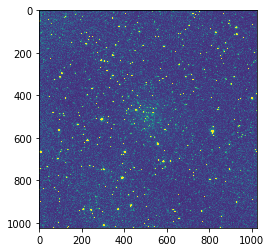

In [35]:
plt.imshow(image_data_list_NGCr[1], vmin=0, vmax=.1)

In [36]:
from photutils import datasets
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture, CircularAnnulus

In [40]:
source_list = []
for image_data_find in image_data_list_M13g:
    bkg_sigma = mad_std(image_data_find)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources = daofind(image_data_find)
    source_list.append(sources)
    print()
    
for i, circular_M13g in enumerate(image_data_list_M13g):
    sources = source_list[i]
    positions = (sources['xcentroid'], sources['ycentroid'])
    apertures = CircularAperture(positions, r=4.) 
    phot_table = aperture_photometry(circular_M13g, apertures)
    print(phot_table)





 id       xcenter            ycenter           aperture_sum   
            pix                pix                            
---- ------------------ ------------------ -------------------
   1  27.21456401385689 1.3755200740953593 0.22325603421388568
   2   124.014841468675 1.5906220341634416    0.21721255508323
   3  963.6306211576612  1.384397656039862  0.5889808291405136
   4 2.0039778501197203 2.2642461833523773 0.19870447375104988
   5 335.00034682798463 1.8758027279524838  0.8630742169022474
   6  741.8830275250721  4.096758085094482  0.2813865287422227
   7 412.86851032451483   8.36722649198746  0.7483540643968161
   8  502.3419011875452  13.08999800840382  0.3657776056845843
   9   784.309802834999 14.885230573909055 0.27386443687534634
  10  393.4328881904446 29.469643081097313  0.3137270425489345
 ...                ...                ...                 ...
1419  691.7209575224476  990.5614687954703  0.4352874220890999
1420  108.1305785197622  992.6287349570616 0.240428

In [37]:
source_list_M13i = []
for image_data_find_M13i in image_data_list_M13i:
    bkg_sigma1 = mad_std(image_data_find_M13i)
    daofind1 = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma1)
    sources_M13i = daofind1(image_data_find_M13i)
    source_list_M13i.append(sources_M13i)
    print()
    
for i, circular_M13i in enumerate(image_data_list_M13i):
    sources_M13i = source_list_M13i[i]
    positions1 = (sources_M13i['xcentroid'], sources_M13i['ycentroid'])
    apertures_M13i = CircularAperture(positions1, r=4.) 
    phot_table_M13i = aperture_photometry(circular_M13i, apertures_M13i)
    print(phot_table_M13i)





 id       xcenter            ycenter           aperture_sum   
            pix                pix                            
---- ------------------ ------------------ -------------------
   1  2.231632349141206  2.010660546928152  0.2824109639556718
   2  336.8338224492494 1.5865448742089343  0.5608999933035171
   3 389.53194289809414 1.9930593586118253 0.24977516921092552
   4  662.6004699438676 1.9757653126434511  0.2908833833107934
   5   725.596313871525 1.7604078989051164 0.24415164991512578
   6  965.3581178505826 1.2078248201424089   0.660612291568662
   7 414.68778808099387  7.758927738138102  0.4961533099294888
   8 504.18274734523595 12.475651458969697  0.5107311253723883
   9  786.5187267653766 14.109631029911938  0.3852468210590389
  10  395.2547872280539 28.854455894889096 0.42961670840916366
 ...                ...                ...                 ...
1381 1018.1768834153918 1003.4700366334465  0.5037289945917867
1382  540.3733077170679  1007.262217834861  0.58763

In [39]:

source_list_M13r = []
for image_data_find_M13r in image_data_list_M13r:
    bkg_sigma = mad_std(image_data_find_M13r)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M13r = daofind(image_data_find_M13r)
    source_list_M13r.append(sources_M13r)
    print()
    
for i, circular_M13r in enumerate(image_data_list_M13r):
    sources_M13r = source_list_M13r[i]
    positions = (sources_M13r['xcentroid'], sources_M13r['ycentroid'])
    apertures_M13r = CircularAperture(positions, r=4.) 
    phot_table_M13r = aperture_photometry(circular_M13r, apertures_M13r)
    print(phot_table_M13r)





 id       xcenter            ycenter           aperture_sum   
            pix                pix                            
---- ------------------ ------------------ -------------------
   1 2.1470953617373496  2.038974347220996 0.24979613865269346
   2 14.276868868807144 1.7540843429354935  0.2600824961454615
   3 124.85172849474489 1.4359128100554819 0.25947530136328095
   4  335.8766005330655 1.3312863723066455  0.7966629752183707
   5  964.3790123982945 1.0395818221411555   0.875469066332492
   6 413.65803984666735   7.75899617113811  0.6870292142229752
   7  503.1383824749778 12.388046435229397  0.5528718456850507
   8  785.3673539012117 14.242522886450255  0.4004434922375529
   9  394.3470468192026 28.682960214960673  0.4710346516896951
  10  830.3872319865454  32.91017975667856  0.5498346401334346
 ...                ...                ...                 ...
1571 108.80720170659649  991.7064427090551 0.35619078900174905
1572 257.91770846515806  997.0406772996857 0.382785

In [41]:
source_list_M13z = []
for image_data_find_M13z in image_data_list_M13z:
    bkg_sigma = mad_std(image_data_find_M13z)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M13z = daofind(image_data_find_M13z)
    source_list_M13z.append(sources_M13z)
    print()
    
for i, circular_M13z in enumerate(image_data_list_M13z):
    sources_M13z = source_list_M13z[i]
    positions = (sources_M13z['xcentroid'], sources_M13z['ycentroid'])
    apertures_M13z = CircularAperture(positions, r=4.) 
    phot_table_M13z = aperture_photometry(circular_M13z, apertures_M13z)
    print()

In [42]:
source_list_M5g = []
for image_data_find_M5g in image_data_list_M5g:
    bkg_sigma = mad_std(image_data_find_M5g)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M5g = daofind(image_data_find_M5g)
    source_list_M5g.append(sources_M5g)
    print()
    
for i, circular_M5g in enumerate(image_data_list_M5g):
    sources_M5g = source_list_M5g[i]
    positions = (sources_M5g['xcentroid'], sources_M5g['ycentroid'])
    apertures_M5g = CircularAperture(positions, r=4.) 
    phot_table_M5g = aperture_photometry(circular_M5g, apertures_M5g)
    print()

In [43]:
source_list_M5i = []
for image_data_find_M5i in image_data_list_M5i:
    bkg_sigma = mad_std(image_data_find_M5i)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M5i = daofind(image_data_find_M5i)
    source_list_M5i.append(sources_M5i)
    print()
    
for i, circular_M5i in enumerate(image_data_list_M5i):
    sources_M5i = source_list_M5i[i]
    positions = (sources_M5i['xcentroid'], sources_M5i['ycentroid'])
    apertures_M5i = CircularAperture(positions, r=4.) 
    phot_table_M5i = aperture_photometry(circular_M5i, apertures_M5i)
    print()

In [44]:
source_list_M5r = []
for image_data_find_M5r in image_data_list_M5r:
    bkg_sigma = mad_std(image_data_find_M5r)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M5r = daofind(image_data_find_M5r)
    source_list_M5r.append(sources_M5r)
    print()
    
for i, circular_M5r in enumerate(image_data_list_M5r):
    sources_M5r = source_list_M5r[i]
    positions = (sources_M5r['xcentroid'], sources_M5r['ycentroid'])
    apertures_M5r = CircularAperture(positions, r=4.) 
    phot_table_M5r = aperture_photometry(circular_M5r, apertures_M5r)
    print()

In [45]:
source_list_M5z = []
for image_data_find_M5z in image_data_list_M5z:
    bkg_sigma = mad_std(image_data_find_M5z)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma)
    sources_M5z = daofind(image_data_find_M5z)
    source_list_M5z.append(sources_M5z)
    print()
    
for i, circular_M5z in enumerate(image_data_list_M5z):
    sources_M5z = source_list_M5z[i]
    positions = (sources_M5z['xcentroid'], sources_M5z['ycentroid'])
    apertures_M5z = CircularAperture(positions, r=4.) 
    phot_table_M5z = aperture_photometry(circular_M5z, apertures_M5z)
    print()

In [46]:
source_list_NGCi = []
for image_data_find_NGCi in image_data_list_NGCi:
    bkg_sigma_Ni = mad_std(image_data_find_NGCi)
    daofind = DAOStarFinder(fwhm=6, threshold=10.*bkg_sigma_Ni)
    sources_NGCi = daofind(image_data_find_NGCi)
    source_list_NGCi.append(sources_NGCi)
    print()

for i, circular_NGCi in enumerate(image_data_list_NGCi):
    sources_NGCi = source_list_NGCi[i]
    positions = (sources_NGCi['xcentroid'], sources_NGCi['ycentroid'])
    apertures_NGCi = CircularAperture(positions, r=3.) 
    phot_table_NGCi = aperture_photometry(circular_NGCi, apertures_NGCi)
    print()

In [47]:
source_list_NGCg = []
for image_data_find_NGCg in image_data_list_NGCg:
    bkg_sigma_N = mad_std(image_data_find_NGCg)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma_N)
    sources_NGCg = daofind(image_data_find_NGCg)
    source_list_NGCg.append(sources_NGCg)
    print()

for i, circular_NGCg in enumerate(image_data_list_NGCg):
    sources_NGCg = source_list_NGCg[i]
    positions = (sources_NGCg['xcentroid'], sources_NGCg['ycentroid'])
    apertures_NGCg = CircularAperture(positions, r=3.) 
    phot_table_NGCg = aperture_photometry(circular_NGCg, apertures_NGCg)
    print()

NameError: name 'image_data_list_NGCg' is not defined

In [48]:
source_list_NGCr = []
for image_data_find_NGCr in image_data_list_NGCr:
    bkg_sigma_Nr = mad_std(image_data_find_NGCr)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma_Nr)
    sources_NGCr = daofind(image_data_find_NGCr)
    source_list_NGCr.append(sources_NGCr)
    print()

for i, circular_NGCr in enumerate(image_data_list_NGCr):
    sources_NGCr = source_list_NGCr[i]
    positions = (sources_NGCr['xcentroid'], sources_NGCr['ycentroid'])
    apertures_NGCr = CircularAperture(positions, r=3.) 
    phot_table_NGCr = aperture_photometry(circular_NGCr, apertures_NGCr)
    print()

In [ ]:
source_list_NGCz = []
for image_data_find_NGCz in image_data_list_NGCz:
    bkg_sigma_Nz = mad_std(image_data_find_NGCz)
    daofind = DAOStarFinder(fwhm=6, threshold=5.*bkg_sigma_Nz)
    sources_NGCz = daofind(image_data_find_NGCz)
    source_list_NGCz.append(sources_NGCz)
    print()

for i, circular_NGCz in enumerate(image_data_list_NGCz):
    sources_NGCz = source_list_NGCz[i]
    positions = (sources_NGCz['xcentroid'], sources_NGCz['ycentroid'])
    apertures_NGCz= CircularAperture(positions, r=3.) 
    phot_table_NGCz = aperture_photometry(circular_NGCz, apertures_NGCz)
    print()

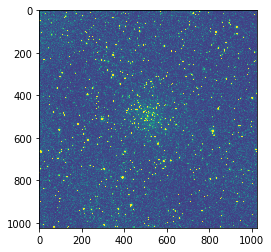

In [49]:
plt.imshow(image_data_list_NGCi[1], vmin=0, vmax=.1)

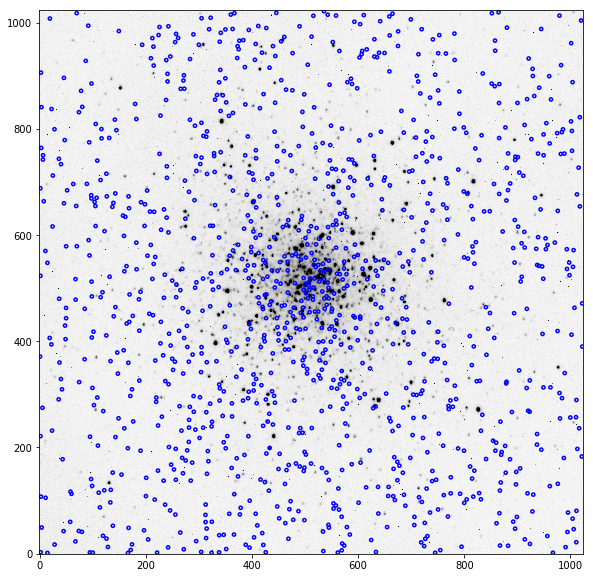

In [163]:
plt.figure(figsize=(11,10))
plt.imshow(image_data_list_M13i[0], cmap='gray_r', origin='lower',vmin=0, vmax=.1)
apertures_NGCi.plot(color='blue', lw=1.5, alpha=1)

In [53]:
# g and z 
# r and i
data = fits.getdata(M13g[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

In [54]:
from astropy.wcs import WCS
w = WCS(M13g[1])
ra, dec = w.all_pix2world(phot_table['xcenter'], phot_table['ycenter'], 0)
phot_table['ra'] = ra
phot_table['dec'] = dec
phot_table.write('M13_phot_g.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [55]:
data1 = fits.getdata(M13i[1])
mean, median, std = sigma_clipped_stats(data1, sigma=3.0)
w1 = WCS(M13i[1])
ra, dec = w1.all_pix2world(phot_table_M13i['xcenter'], phot_table_M13i['ycenter'], 0)
phot_table_M13i['ra'] = ra
phot_table_M13i['dec'] = dec
phot_table_M13i.write('M13_phot_i.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [56]:
data2 = fits.getdata(M13r[1])
mean, median, std = sigma_clipped_stats(data2, sigma=3.0)
w2 = WCS(M13r[1])
ra, dec = w2.all_pix2world(phot_table_M13r['xcenter'], phot_table_M13r['ycenter'], 0)
phot_table_M13r['ra'] = ra
phot_table_M13r['dec'] = dec
phot_table_M13r.write('M13_phot_r.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [57]:
data3 = fits.getdata(M13z[1])
mean, median, std = sigma_clipped_stats(data3, sigma=3.0)
w3 = WCS(M13z[1])
ra, dec = w3.all_pix2world(phot_table_M13z['xcenter'], phot_table_M13z['ycenter'], 0)
phot_table_M13z['ra'] = ra
phot_table_M13z['dec'] = dec
phot_table_M13z.write('M13_phot_z.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [58]:
data4 = fits.getdata(M5g[1])
mean4, median4, std4 = sigma_clipped_stats(data4, sigma=3.0)
w4 = WCS(M5g[1])
ra4, dec4 = w4.all_pix2world(phot_table_M5g['xcenter'], phot_table_M5g['ycenter'], 0)
phot_table_M5g['ra'] = ra4
phot_table_M5g['dec'] = dec4
phot_table_M5g.write('M5_phot_g.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [59]:
data = fits.getdata(M5i[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
from astropy.wcs import WCS
w = WCS(M5i[1])
ra, dec = w.all_pix2world(phot_table_M5i['xcenter'], phot_table_M5i['ycenter'], 0)
phot_table_M5i['ra'] = ra
phot_table_M5i['dec'] = dec
phot_table_M5i.write('M5_phot_i.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [60]:
data = fits.getdata(M5r[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
from astropy.wcs import WCS
w = WCS(M5r[1])
ra, dec = w.all_pix2world(phot_table_M5r['xcenter'], phot_table_M5r['ycenter'], 0)
phot_table_M5r['ra'] = ra
phot_table_M5r['dec'] = dec
phot_table_M5r.write('M5_phot_r.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [61]:
data = fits.getdata(M5z[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
from astropy.wcs import WCS
w = WCS(M5z[1])
ra, dec = w.all_pix2world(phot_table_M5z['xcenter'], phot_table_M5z['ycenter'], 0)
phot_table_M5z['ra'] = ra
phot_table_M5z['dec'] = dec
phot_table_M5z.write('M5_phot_z.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [62]:
data = fits.getdata(NGCi[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
from astropy.wcs import WCS
w = WCS(NGCi[1])
ra, dec = w.all_pix2world(phot_table_NGCi['xcenter'], phot_table_NGCi['ycenter'], 0)
phot_table_NGCi['ra'] = ra
phot_table_NGCi['dec'] = dec
phot_table_NGCi.write('NGC_phot_i.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [63]:
data = fits.getdata(NGCr[1])
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
w = WCS(NGCr[1])
ra, dec = w.all_pix2world(phot_table_NGCr['xcenter'], phot_table_NGCr['ycenter'], 0)
phot_table_NGCr['ra'] = ra
phot_table_NGCr['dec'] = dec
phot_table_NGCr.write('NGC_phot_r.csv', format='csv')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [3]:
#yo yo yo im starting the second part now! No need to run the above again! YEEHAW

from astropy.table import Table
phot_table_M13i = Table.read('M13_phot_i.csv', format='csv')
phot_table_M13z = Table.read('M13_phot_z.csv', format='csv')
phot_table_M13g = Table.read('M13_phot_g.csv', format='csv')
phot_table_M13r = Table.read('M13_phot_r.csv', format='csv')
phot_table_M5i = Table.read('M5_phot_i.csv', format='csv')
phot_table_M5z = Table.read('M5_phot_z.csv', format='csv')
phot_table_M5g = Table.read('M5_phot_g.csv', format='csv')
phot_table_M5r = Table.read('M5_phot_r.csv', format='csv')
phot_table_NGCr = Table.read('NGC_phot_r.csv', format='csv')
phot_table_NGCi = Table.read('NGC_phot_i.csv', format='csv')

In [4]:
from astropy.coordinates import SkyCoord
coords_M13i = SkyCoord(ra=phot_table_M13i['ra'], dec=phot_table_M13i['dec'], unit='deg')  
coords_M13z = SkyCoord(ra=phot_table_M13z['ra'], dec=phot_table_M13z['dec'], unit='deg')
coords_M13r = SkyCoord(ra=phot_table_M13r['ra'], dec=phot_table_M13r['dec'], unit='deg')  
coords_M13g = SkyCoord(ra=phot_table_M13g['ra'], dec=phot_table_M13g['dec'], unit='deg')

In [5]:
coords_M5i = SkyCoord(ra=phot_table_M5i['ra'], dec=phot_table_M5i['dec'], unit='deg')  
coords_M5z = SkyCoord(ra=phot_table_M5z['ra'], dec=phot_table_M5z['dec'], unit='deg')
coords_M5r = SkyCoord(ra=phot_table_M5r['ra'], dec=phot_table_M5r['dec'], unit='deg')  
coords_M5g = SkyCoord(ra=phot_table_M5g['ra'], dec=phot_table_M5g['dec'], unit='deg')

In [6]:
coords_NGCr = SkyCoord(ra=phot_table_NGCr['ra'], dec=phot_table_NGCr['dec'], unit='deg')  
coords_NGCi = SkyCoord(ra=phot_table_NGCi['ra'], dec=phot_table_NGCi['dec'], unit='deg')

In [7]:
r_indexes, dist_2d, dist_3d = coords_M13i.match_to_catalog_sky(coords_M13r)
good_matches_M13ir = (dist_2d.to('arcsec').value < 1)

In [8]:
z_indexes, dist_2d, dist_3d = coords_M13g.match_to_catalog_sky(coords_M13z)
good_matches_M13zg = (dist_2d.to('arcsec').value < 1)

In [9]:
# select only the rows that are good matches
phot_table_matched_M13ir = phot_table_M13i[good_matches_M13ir]
phot_table_matched_M13ir.rename_column('aperture_sum', 'aperture_sum_i')

# get the matched values from phot_table_z
# first we get in the same order as phot_table_i using z_indexes
phot_table_r_reordered = phot_table_M13r[r_indexes]
# next we select only the good matches, same as with phot_table_i
phot_table_r_matched = phot_table_r_reordered[good_matches_M13ir]

# now we can add the z flux column to the matched table
phot_table_matched_M13ir['aperture_sum_r'] = phot_table_r_matched['aperture_sum']

In [10]:
phot_table_matched_M13zg = phot_table_M13g[good_matches_M13zg]
phot_table_matched_M13zg.rename_column('aperture_sum', 'aperture_sum_g')
phot_table_z_reordered = phot_table_M13z[z_indexes]
phot_table_z_matched = phot_table_z_reordered[good_matches_M13zg]
phot_table_matched_M13zg['aperture_sum_z'] = phot_table_z_matched['aperture_sum']


In [11]:
z_indexes, dist_2d, dist_3d = coords_M5g.match_to_catalog_sky(coords_M5z)
good_matches_M5zg = (dist_2d.to('arcsec').value < 1)

phot_table_matched_M5zg = phot_table_M5g[good_matches_M5zg]
phot_table_matched_M5zg.rename_column('aperture_sum', 'aperture_sum_g')
phot_table_z_reordered = phot_table_M5z[z_indexes]
phot_table_z_matched = phot_table_z_reordered[good_matches_M5zg]
phot_table_matched_M5zg['aperture_sum_z'] = phot_table_z_matched['aperture_sum']

In [12]:
r_indexes, dist_2d, dist_3d = coords_M5i.match_to_catalog_sky(coords_M5r)
good_matches_M5ir = (dist_2d.to('arcsec').value < 1)

phot_table_matched_M5ir = phot_table_M5i[good_matches_M5ir]
phot_table_matched_M5ir.rename_column('aperture_sum', 'aperture_sum_i')
phot_table_r_reordered = phot_table_M5r[r_indexes]
phot_table_r_matched = phot_table_r_reordered[good_matches_M5ir]
phot_table_matched_M5ir['aperture_sum_r'] = phot_table_r_matched['aperture_sum']

In [13]:
r_indexes, dist_2d, dist_3d = coords_NGCi.match_to_catalog_sky(coords_NGCr)
good_matches_NGCir = (dist_2d.to('arcsec').value < 1)

phot_table_matched_NGCir = phot_table_NGCi[good_matches_NGCir]
phot_table_matched_NGCir.rename_column('aperture_sum', 'aperture_sum_i')
phot_table_r_reordered = phot_table_NGCr[r_indexes]
phot_table_r_matched = phot_table_r_reordered[good_matches_NGCir]
phot_table_matched_NGCir['aperture_sum_r'] = phot_table_r_matched['aperture_sum']

In [14]:
#phot_table_matched_M13zg.write('M13_phot_g_z_matched.csv', format='csv')
phot_table_matched_M13ir.write('M13_phot_i_r_matched.csv', format='csv')
#phot_table_matched_M5zg.write('M5_phot_g_z_matched.csv', format='csv')
phot_table_matched_M5ir.write('M5_phot_i_r_matched.csv', format='csv')
phot_table_matched_NGCir.write('NGC_phot_i_r_matched.csv', format='csv')

In [18]:
flux_r = phot_table_matched_M13ir["aperture_sum_r"]
flux_i = phot_table_matched_M13ir["aperture_sum_i"]

# (apparent mag) mr - mi = -2.5log(flux_r / flux_i):
mi = -2.5 * np.log(flux_i)
mr = -2.5 * np.log(flux_r)

#apparent magnitude is M = m + 5 -log(d/10)     for M13 d =  6.8 *10^3

Mr = mr + 5 - 5*np.log(6800 / 10)
Mi = mi + 5 - 5*np.log(6800 / 10)

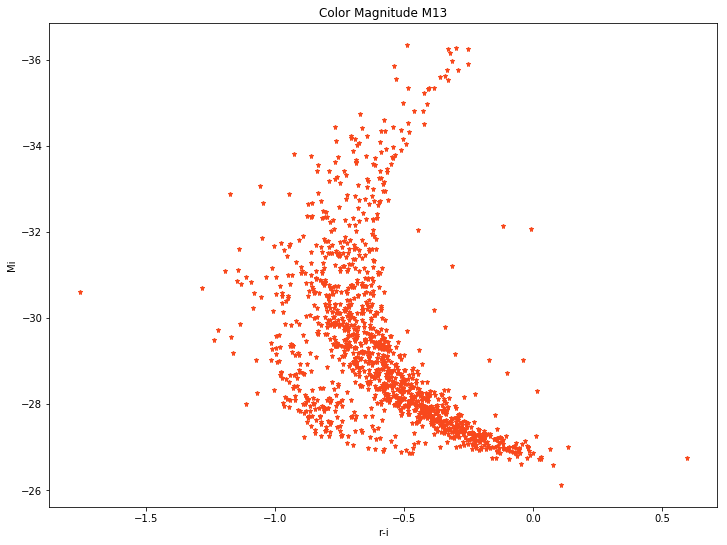

In [30]:
fig, ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.tight_layout()

ri = Mr-Mi

ax.set_title("Color Magnitude M13")
ax.set_xlabel("r-i")
ax.set_ylabel("Mi")
ax.invert_yaxis()
ax.set_aspect(1/6) 

ax.plot(ri, Mi ,c="xkcd:reddish orange", marker="*",linestyle="None",markersize=5);

In [20]:
flux_r1 = phot_table_matched_M5ir["aperture_sum_r"]
flux_i1 = phot_table_matched_M5ir["aperture_sum_i"]

# (apparent mag) mr - mi = -2.5log(flux_r / flux_i):
mi1 = -2.5 * np.log(flux_i1)
mr1 = -2.5 * np.log(flux_r1)

#apparent magnitude is M = m + 5 -log(d/10)     for M13 d =  7.5 *10^3

Mr1 = mr1 + 5 - 5*np.log(7500 / 10)
Mi1 = mi1 + 5 - 5*np.log(7500 / 10)

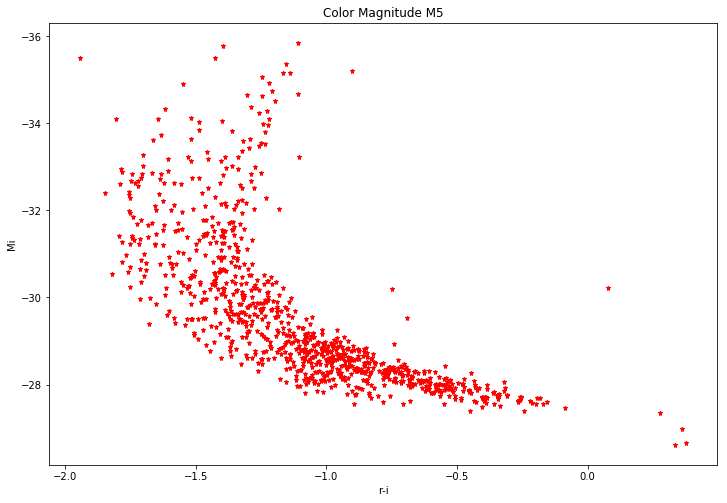

In [29]:
fig, ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.tight_layout()

ri1 = Mr1 - Mi1

ax.set_title("Color Magnitude M5")
ax.set_xlabel("r-i")
ax.set_ylabel("Mi")
ax.invert_yaxis()
ax.set_aspect(1/6) 

ax.plot(ri1, Mi1 ,c="red", marker="*",linestyle="None",markersize=5);

In [22]:
flux_r2 = phot_table_matched_NGCir["aperture_sum_r"]
flux_i2 = phot_table_matched_NGCir["aperture_sum_i"]

# (apparent mag) mr - mi = -2.5log(flux_r / flux_i):
mi2 = -2.5 * np.log(flux_i2)
mr2 = -2.5 * np.log(flux_r2)

# apparent magnitude is M = m + 5 -log(d/10)     for M13 d =  7.8*10^3 
# from http://adsabs.harvard.edu/full/1997PASP..109..920K

Mr2 = mr2 + 5 - 5*np.log(7800 / 10)
Mi2 = mi2 + 5 - 5*np.log(7800 / 10)

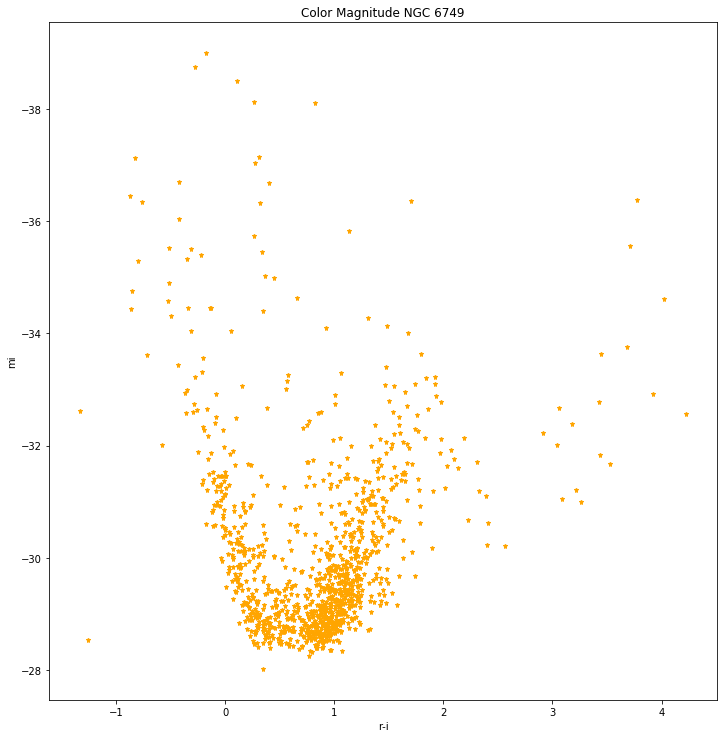

In [28]:
fig, ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.tight_layout()

ir2 = Mr2 - Mi2

ax.set_title("Color Magnitude NGC 6749")
ax.set_xlabel("r-i")
ax.set_ylabel("mi")
ax.invert_yaxis()


ax.plot(ir2, Mi2 ,c="orange", marker="*",linestyle="None",markersize=5);